## Klassifizierung MNIST Datensatz

## Datensatz laden

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (60000, 28, 28)
Shape of x_test is (10000, 28, 28)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


## Datensatz visualisieren

Labels are [0 9 6 8 8 4 9 1 0 9 2 4 7 3 3 0 4 2 5 6 9 2 3 7 2]


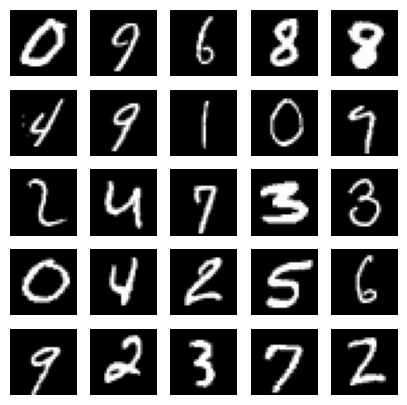

In [3]:
import numpy as np
import matplotlib.pyplot as plt
indices = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indices]
labels = y_train[indices]

plt.figure(figsize=(5, 5))
print(f"Labels are {labels}")
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    label = labels[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

## Daten von 3D Tensor zu 2D Tensor umwandeln

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))
print(f"Shape x_train {x_train.shape}")
print(f"Shape x_test {x_test.shape}")

Shape x_train (60000, 784)
Shape x_test (10000, 784)


## Farbwerte von 0 - 255 auf 0 - 1.0 normalisieren

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
x_train[0:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## One-Hot Encoding

In [7]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Modell definieren

In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

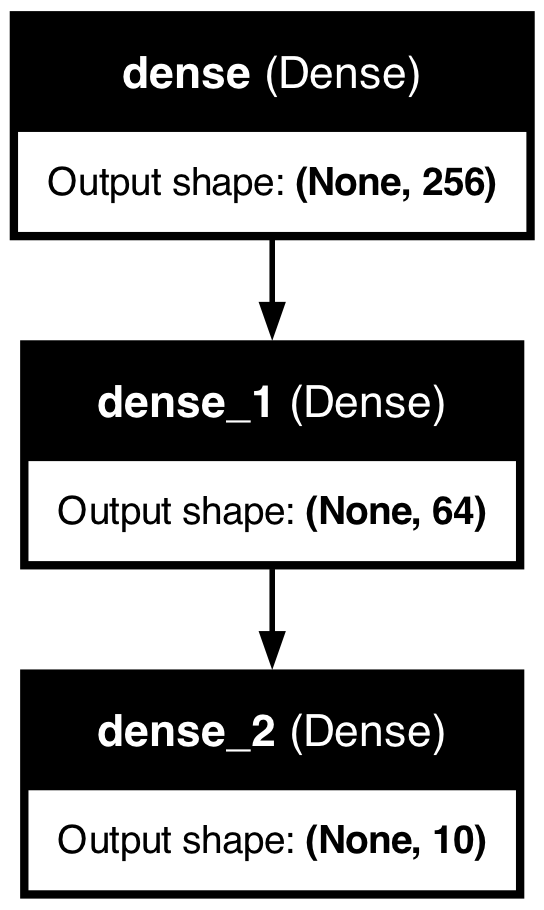

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Model kompilieren

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model trainieren

In [14]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.10)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 0.5413 - val_accuracy: 0.9655 - val_loss: 0.1214
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9616 - loss: 0.1271 - val_accuracy: 0.9748 - val_loss: 0.0873
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9770 - loss: 0.0757 - val_accuracy: 0.9772 - val_loss: 0.0837
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9775 - val_loss: 0.0742
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0377 - val_accuracy: 0.9755 - val_loss: 0.0864
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9907 - loss: 0.0312 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9777 - val_loss: 0.0813
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.

In [15]:
history.history['accuracy'][19]

0.9970185160636902

## Model evaluieren

Modell Genauigkeit


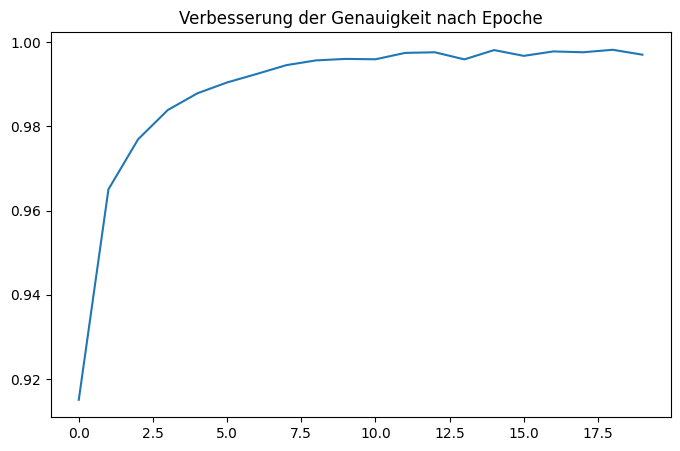

In [16]:
import pandas as pd
print("Modell Genauigkeit")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Verbesserung der Genauigkeit nach Epoche")
plt.show()

In [20]:
model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step


array([[3.34663152e-18, 3.81891513e-13, 3.95801996e-14, ...,
        8.95781116e-14, 2.53043681e-15, 3.28956393e-12],
       [1.00000000e+00, 1.70106292e-16, 3.96393964e-13, ...,
        2.54340939e-16, 5.88517241e-19, 1.17467122e-14],
       [5.99729142e-14, 1.90534593e-06, 3.14422710e-09, ...,
        9.31235089e-09, 5.38995758e-12, 1.28571598e-08],
       ...,
       [1.58359522e-15, 8.53426487e-14, 1.37041214e-18, ...,
        2.07296610e-16, 7.13392123e-11, 1.11246845e-10],
       [6.85721369e-10, 2.04180829e-13, 5.81921733e-11, ...,
        6.87793167e-15, 3.54678786e-12, 3.00306858e-14],
       [8.32862222e-14, 6.24439380e-15, 8.40958501e-14, ...,
        1.33172512e-13, 1.00000000e+00, 1.80095849e-09]], dtype=float32)